In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def first_best_policy(p0,rho,c,n,r=0,lamb=0):
    """
    Policy for trustworthy recommender system implemented by
    Bayesian Optimal Policy (BOP)

    Args:
        p0: Prior for recieving good news (constant)
        rho: Background learning (constant)
        c: cost of consuming product
        n: Horizon
    """ 
    qi = np.zeros(n+1)
    gi = np.zeros(n+1)
    wi = np.zeros([2,n+1])
    pi = np.zeros(n+1)
    alphai = np.ones(n+1)
    pi[0] = ((1-rho)*p0 )/ ((1-rho)*p0 + 1 - p0)
    for i in range(1,n+1):
        pi[i] = (pi[i-1]*(1-rho*alphai[i-1])) / (pi[i-1]*(1-rho*alphai[i-1])+(1-pi[i-1]))
    
    for i in range(n+1):
        gi[i] = (p0 - pi[i])/(1-pi[i])
        qi[i] = (gi[i] + (1-gi[i])*alphai[i]*pi[i]) / ((gi[i]) + (1-gi[i])*alphai[i])
        if qi[i] < c:
            alphai[i] = 0
        
    for i in range(n-1,-1,-1):
        wi[0][i] = (1-c)*(n-i+1)
        w = (1-c)*pi[i] + (-c)*(1-pi[i]) + rho*pi[i]*wi[0][i+1]-rho*pi[i]*wi[1][i+1]
        #print(qi)
        if w > 0:
            wi[1][i] = w*alphai[i] + wi[1][i+1]
        else:
            alphai[i] = 0
            wi[1][i] = wi[1][i+1]
    return pi,alphai,wi[1][:],qi

In [4]:
def second_best_policy(p0,rho,c,n):
    """
    Policy for trustworthy recommender system implemented by
    Bayesian Optimal Policy (BOP)

    Args:
        p0: Prior for recieving good news (constant)
        rho: Background learning (constant)
        c: cost of consuming product
        n: Horizon
    """ 
    qi = np.zeros(n+1)
    gi = np.zeros(n+1)
    wi = np.zeros([2,n+1])
    pi = np.zeros(n+1)
    alphai = np.zeros(n+1)
    pi[0] = ((1-rho)*p0 )/ ((1-rho)*p0 + 1 - p0)
    for i in range(1,n+1):
        alphai[i-1] = ((1-c)*(p0-pi[i-1]))/((1-p0)*(c-pi[i-1]))
        pi[i] = (pi[i-1]*(1-rho*alphai[i-1])) / (pi[i-1]*(1-rho*alphai[i-1])+(1-pi[i-1]))
    
    for i in range(n+1):
        gi[i] = (p0 - pi[i])/(1-pi[i])
        qi[i] = (gi[i] + (1-gi[i])*alphai[i]*pi[i]) / ((gi[i]) + (1-gi[i])*alphai[i])
        
    for i in range(n-1,-1,-1):
        wi[0][i] = (1-c)*(n-i+1)
        w = (1-c)*pi[i] + (-c)*(1-pi[i]) + rho*pi[i]*wi[0][i+1]-rho*pi[i]*wi[1][i+1]
        #print(qi)
        if w > 0:
            wi[1][i] = w*alphai[i] + wi[1][i+1]
        else:
            wi[1][i] = wi[1][i+1]
    return pi,alphai,wi[1][:],qi

In [22]:
def experiments(p0=0.5,rho=0.25,c=2/3,n=1000):
    """
    Experiments for Trustworthy Recommender Systems

    Args:
        p0: Prior for recieving good news (constant)
        rho: Background learning (constant)
        c: cost of consuming product
        n: Horizon
    """ 
    p1,alpha1,w1,q1 = first_best_policy(p0,rho,c,n)
    p2,alpha2,w2,q2 = second_best_policy(p0,rho,c,n)
    a = np.arange(1, 51).tolist()
    a = np.array([0, 0.5] + a).tolist()
    plt.plot(a,[1, 1] + alpha1[:50].tolist(),'-',label='first_best_policy', )
    plt.plot(range(1, 51),alpha2[:50],'-', label='second_best_policy')
    plt.plot()
    plt.legend()
    plt.title("Alpha vs. Timestep")
    plt.xlabel("time")
    plt.ylabel("alpha")
    plt.tight_layout()
    plt.savefig('alpha.pdf')
    return 1

1

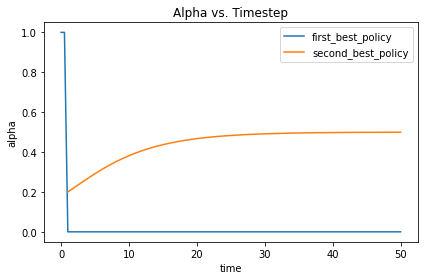

In [23]:
experiments()